<a href="https://colab.research.google.com/github/adervish/random_public/blob/main/NYC_Hospitals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import requests
import json
import numpy as np
import matplotlib

live_url = 'https://health.data.ny.gov/api/views/jw46-jpb7/rows.csv?accessType=DOWNLOAD'
snapshot_url = 'https://raw.githubusercontent.com/adervish/random_public/main/2021_12_17_snapshot.csv'

df = pd.read_csv(snapshot_url)
df['As of Date']= pd.to_datetime(df['As of Date'])


[('Patients Currently Hospitalized', 'CAPITAL REGION'),
 ('Patients Currently Hospitalized', 'CENTRAL NEW YORK'),
 ('Patients Currently Hospitalized', 'FINGER LAKES'),
 ('Patients Currently Hospitalized', 'LONG ISLAND'),
 ('Patients Currently Hospitalized', 'MID-HUDSON'),
 ('Patients Currently Hospitalized', 'MOHAWK VALLEY'),
 ('Patients Currently Hospitalized', 'NEW YORK CITY'),
 ('Patients Currently Hospitalized', 'NORTH COUNTRY'),
 ('Patients Currently Hospitalized', 'SOUTHERN TIER'),
 ('Patients Currently Hospitalized', 'WESTERN NEW YORK')]

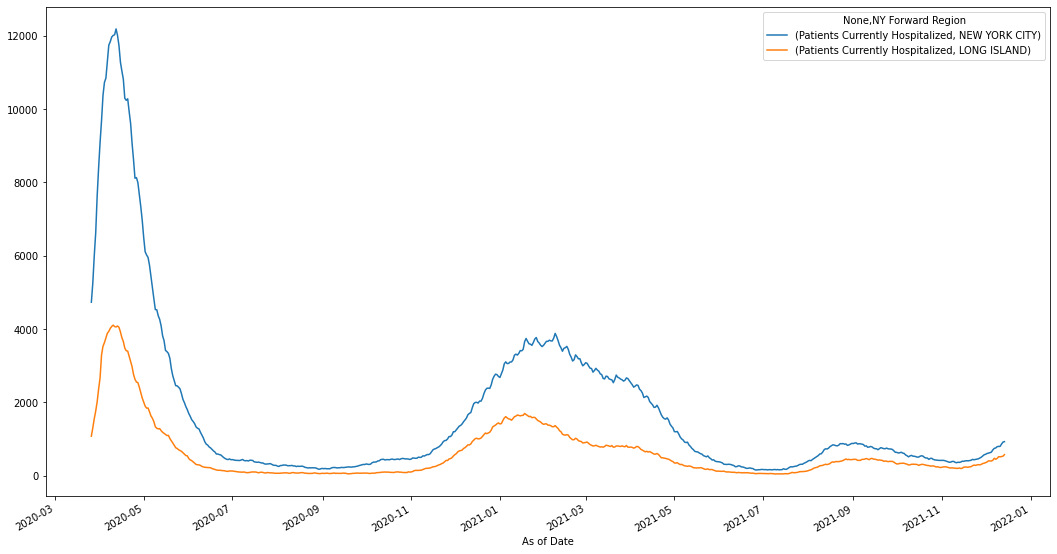

In [5]:
pvt = pd.pivot_table(data=df,index=['As of Date'], 
                            columns=['NY Forward Region'],
                         aggfunc={'Patients Currently Hospitalized': np.sum})

#for c in pvt.columns:
#    pvt[c] =  np.log(pvt[('Patients Currently Hospitalized', 'NEW YORK CITY')] /pvt[c])

pvt.plot( y=[('Patients Currently Hospitalized', 'NEW YORK CITY'), ('Patients Currently Hospitalized', 'LONG ISLAND')], figsize=(18,10) )
list(pvt.columns)

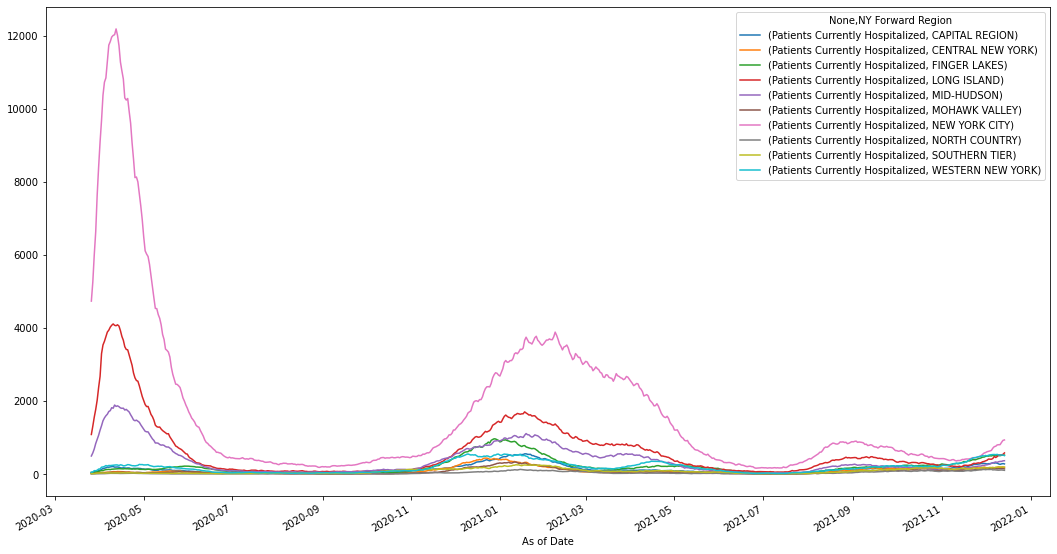

In [7]:
pvt.plot(figsize=(18,10))